<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

# Данные об отправке


**Ник на Kaggle: Nuoki**

**Имя команды: Дмитрий_Михайлов**

**Telegram: @Nuoki**

Лучшая точность: 0.85296

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
train.head(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
5,25,19.80,475.2,Female,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
6,27,90.15,2423.4,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,No,Bank transfer (automatic),0
7,1,45.70,45.7,Male,0,No,No,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,1
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
9,72,61.20,4390.25,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0


In [6]:
train.tail(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
5272,36,54.45,1893.5,Female,0,No,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Mailed check,0
5273,60,104.35,6339.45,Male,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,0
5274,2,69.75,144.55,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),1
5275,21,19.95,416.4,Male,0,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,0
5276,72,98.20,7015.9,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5281,19,75.90,1375.6,Female,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,0


In [7]:
train.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4003,40,64.10,2460.35,Female,0,No,Yes,Yes,No,DSL,Yes,No,No,Yes,Yes,No,Month-to-month,Yes,Credit card (automatic),0
1639,48,99.00,4744.35,Male,1,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Electronic check,0
2533,53,19.05,990.45,Female,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),0
1975,68,25.75,1686.15,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
2478,45,25.50,1121.05,Female,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1487,4,70.40,281,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,1
2602,72,115.15,8349.7,Female,0,Yes,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,0
4820,72,26.25,1988.05,Female,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),0
3014,21,104.40,2157.95,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,1
2555,16,94.45,1511.2,Female,1,No,No,Yes,No,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1


In [8]:
# Смотрим на Nan'ы в данных
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Есть колонка 'TotalSpent', которая имеет тип np.object, но содержит числовые значения.

Также имеем колонку 'IsSeniorCitizen', содержащая значения 0/1 и является категориальной. 

Переведем колонку 'TotalSpent' к числовому типу, а значения 0/1 в колонке 'IsSeniorCitizen' приведем к No/Yes соответственно. После проверим не появились ли Nan-значения.

In [9]:
train['TotalSpent'] = pd.to_numeric(train['TotalSpent'], errors='coerce')
train['IsSeniorCitizen'] = train['IsSeniorCitizen'].map({0: 'No', 1: 'Yes'})

In [10]:
train.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

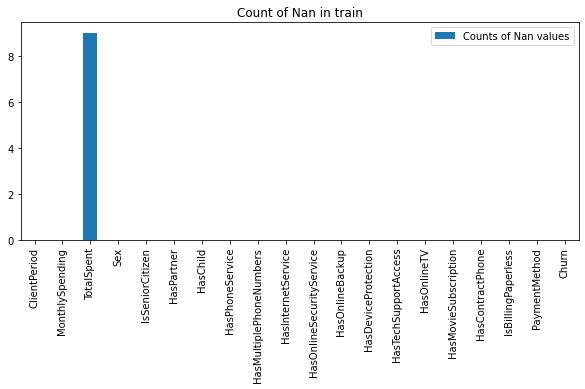

In [11]:
nan_count_df = pd.DataFrame(train.isna().sum(), columns=['Counts of Nan values'])
nan_count_df.plot(kind='bar', figsize=(10, 4), title='Count of Nan in train')

Аналогичные действия проведем с данными в test

In [12]:
test['TotalSpent'] = pd.to_numeric(test['TotalSpent'], errors='coerce')
test['IsSeniorCitizen'] = test['IsSeniorCitizen'].map({0: 'No', 1: 'Yes'})

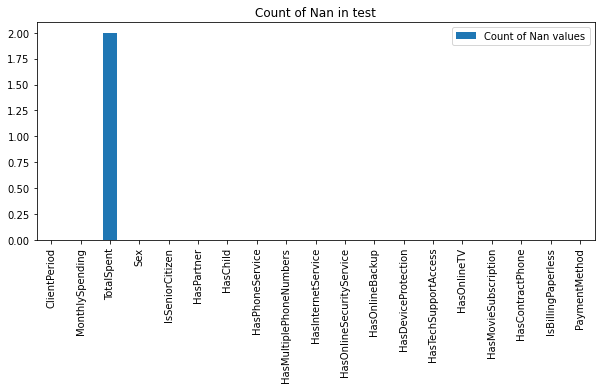

In [13]:
nan_count_df_test = pd.DataFrame(test.isna().sum(),
                                 columns=['Count of Nan values'])
nan_count_df_test.plot(kind='bar', figsize=(10, 4), 
                       title='Count of Nan in test')

Посчитаем процент Nan-значений в test и train.

In [14]:
print("% Nan values in train", 
      train['TotalSpent'].isna().sum() / train.shape[0])
print("% Nan values in test",
      test['TotalSpent'].isna().sum() / test.shape[0])

% Nan values in train 0.0017039000378644452
% Nan values in test 0.001135718341851221


Количество Nan-значений меньше 1 процента, поэтому заменим все Nan'ы на 0.
Такое количество изменений никак не повлияют на дальнейшее обучение нашей модели

In [15]:
train.fillna(0.0, inplace=True)
test.fillna(0.0, inplace=True)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Посмотрим на распределение численных признаков.

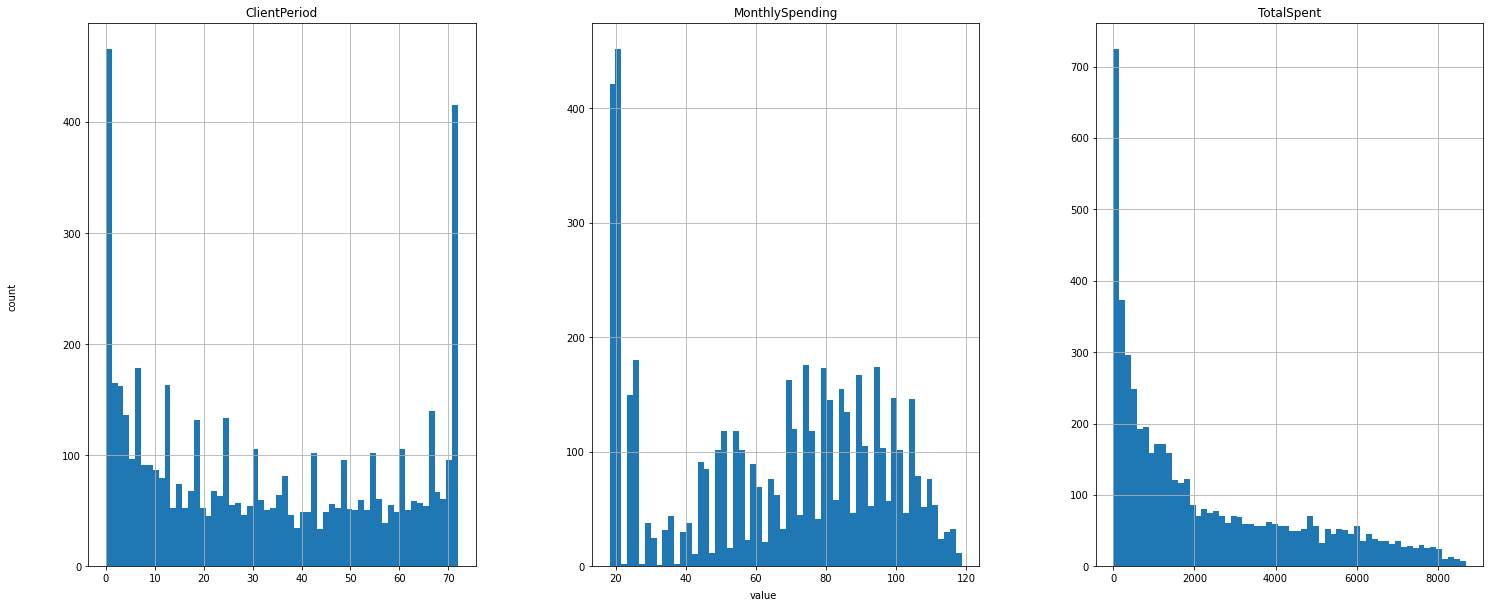

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(25, 10))

train[num_cols].hist(bins=60, figsize=(10, 8), ax=axes)
fig.text(0.5, 0.08, 'value', ha='center')
fig.text(0.08, 0.5, 'count', va='center', rotation='vertical')
None

Посмотрим на связь целевой переменной с категориальными признаками

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

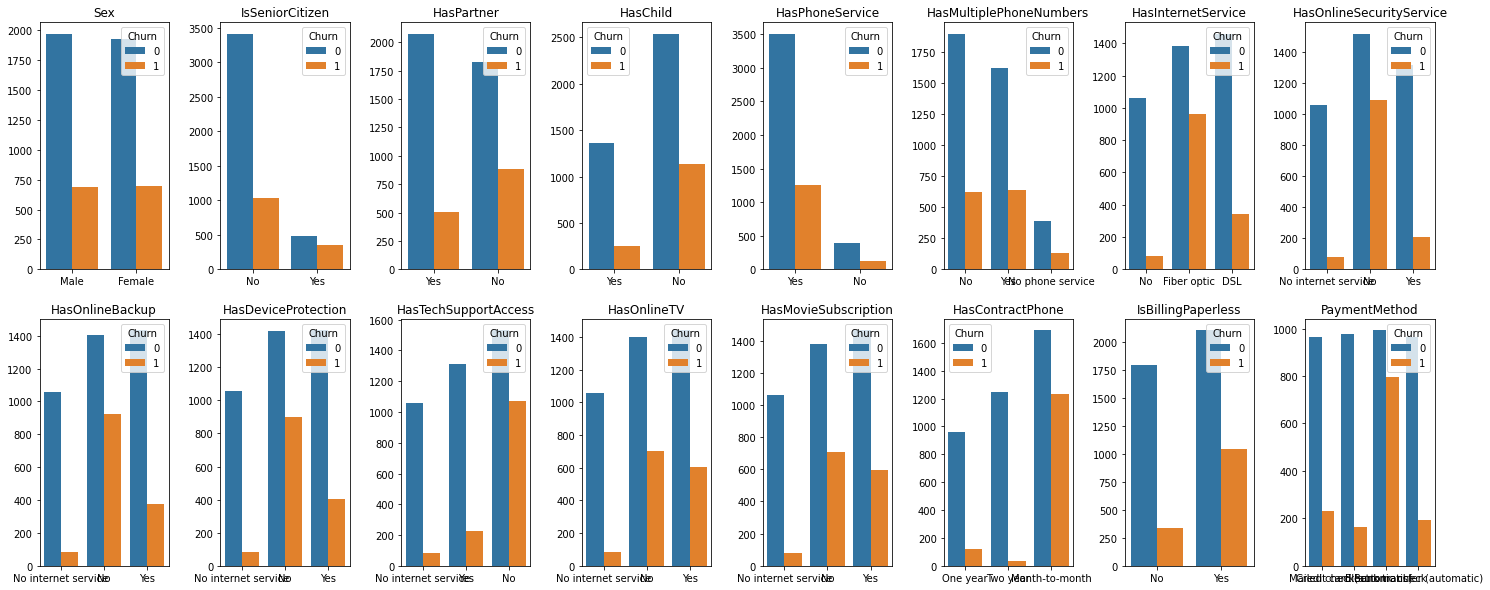

In [17]:
fig, axes = plt.subplots(2, 8, figsize=(25, 10), gridspec_kw={'wspace': 0.4})

for column, ax in zip(cat_cols, axes.flat):
  sns.countplot(column, hue='Churn', data=train, ax=ax).set_title(column)

plt.setp(axes, xlabel=None, ylabel=None)

plt.show()
None

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

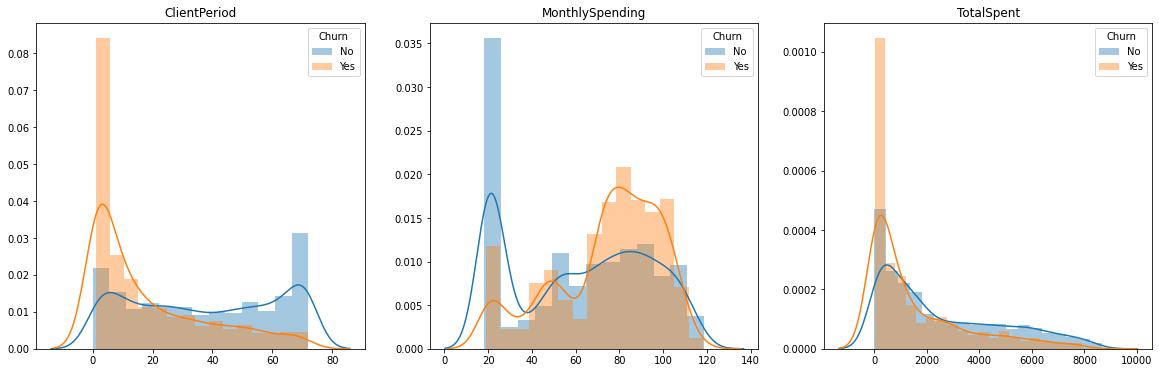

In [18]:
# Анализ количественных признаков
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for column, ax in zip(num_cols, axes.flat):
  sns.distplot(train.query("Churn == 0")[column],
               label='No', ax=ax).set_title(column)
  sns.distplot(train.query("Churn == 1")[column],
               label='Yes', ax=ax).set_title(column)
  ax.legend(loc='upper right', title='Churn')


plt.setp(axes, xlabel=None, ylabel=None)

plt.show()

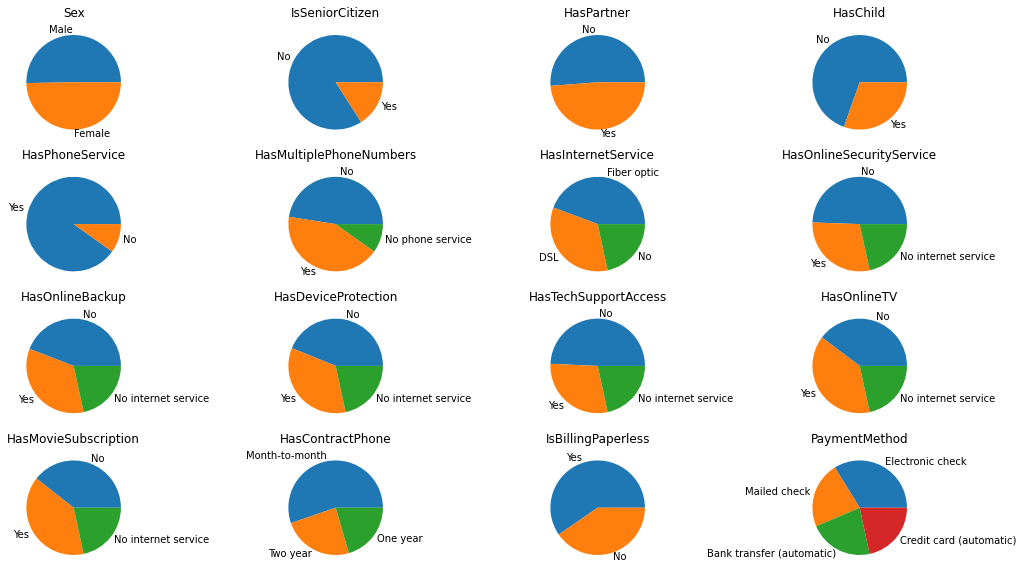

In [19]:
fig, axes = plt.subplots(4, 4, figsize=(18, 10))

for ax, col in zip(axes.flatten(), cat_cols):
  ax.set_title(col)
  counts = train[col].value_counts()
  labels = counts.index
  ax.pie(counts, labels=labels)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Заменим значения "No internet service" и "No phone service" в колонках на "No", 
так как у нас есть колонки HasInternetService / HasPhoneService.

Возможно такие значения появились из-за сбоя на сервере => отсюда появились такие значения в данных.

In [20]:
cat_replacements = {"No internet service": "No",
                    "No phone service": "No"}

train.replace(cat_replacements, inplace=True)
test.replace(cat_replacements, inplace=True)

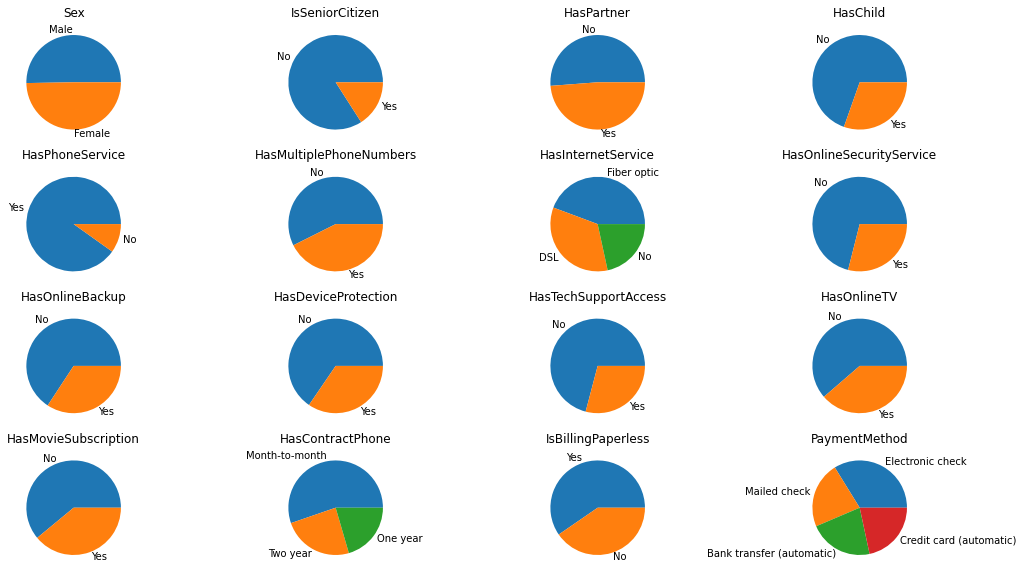

In [21]:
fig, axes = plt.subplots(4, 4, figsize=(18, 10))

for ax, col in zip(axes.flatten(), cat_cols):
  ax.set_title(col)
  counts = train[col].value_counts()
  labels = counts.index
  ax.pie(counts, labels=labels)

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [23]:
X_train, y_train = train[feature_cols], train[target_col]

X_train.shape, y_train.shape

((5282, 19), (5282,))

In [24]:
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
      ("numerical", num_transformer, num_cols),
      ("categorical", cat_transformer, cat_cols)
    ]
)

In [26]:
log_reg_model = LogisticRegression(penalty="l1", 
                             solver="saga",
                             max_iter=1000,
                             random_state=42)


In [27]:
params = {
    "logisticregression__C" : [0.001, 0.01, 0.1, 1, 10, 100]
}

In [28]:
clf = make_pipeline(preprocessor, log_reg_model)

In [29]:
grid_search_cv_log = GridSearchCV(estimator=clf, param_grid=params,
                                  cv=5, scoring="roc_auc", verbose=5,
                                  n_jobs=-1, refit=True)

In [30]:
log_reg = grid_search_cv_log.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [31]:
print(f"best score:{log_reg.best_score_}")
print(f"best params:{log_reg.best_params_}")

best score:0.8451194876516641
best params:{'logisticregression__C': 100}


In [32]:
best_log_reg = log_reg.best_estimator_

In [ ]:
first_submit = pd.read_csv('./submission.csv')
first_submit['Churn'] = best_log_reg.predict_proba(test)[:, 1]
first_submit.to_csv("first_submit.csv", index=False)

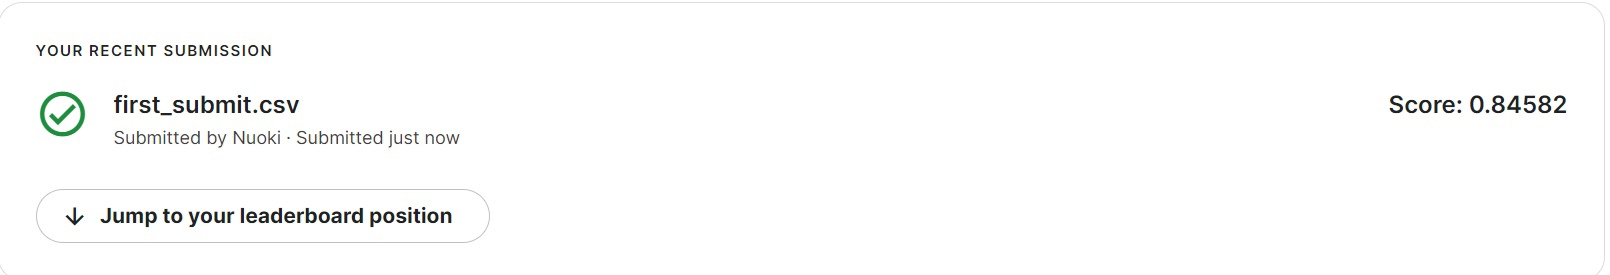

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [72]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.2 MB/s 


In [33]:
from catboost import CatBoostClassifier

In [34]:
my_catboost = CatBoostClassifier(
    cat_features=cat_cols,
    logging_level="Silent",
    eval_metric="AUC:hints=skip_train~false",
    grow_policy="Lossguide",
    metric_period=100,
    random_seed=42
)

params = {
    "max_depth": [2, 4, 8],
    "subsample": [0.1, 1, 10],
    "n_estimators": [10, 50, 100],
    "random_strength": [1, 10, 100],
    "learning_rate": [0.01, 0.1, 0.5]
}

In [35]:
my_catboost.grid_search(params, X_train, y_train, cv=10, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.8484753	best: 0.8484753 (0)	total: 103ms	remaining: 25s
1:	loss: 0.8636794	best: 0.8636794 (1)	total: 141ms	remaining: 17s
2:	loss: 0.8632710	best: 0.8636794 (1)	total: 177ms	remaining: 14.2s
3:	loss: 0.8607513	best: 0.8636794 (1)	total: 366ms	remaining: 21.8s
4:	loss: 0.8692274	best: 0.8692274 (4)	total: 542ms	remaining: 25.8s
5:	loss: 0.8699893	best: 0.8699893 (5)	total: 745ms	remaining: 29.4s
6:	loss: 0.8635074	best: 0.8699893 (5)	total: 1.11s	remaining: 37.4s
7:	loss: 0.8697481	best: 0.8699893 (5)	total: 1.46s	remaining: 42.9s
8:	loss: 0.8678064	best: 0.8699893 (5)	total: 1.83s	remaining: 47.6s
9:	loss: 0.8403072	best: 0.8699893 (5)	total: 1.87s	remaining: 43.6s
10:	loss: 0.8602354	best: 0.8699893 (5)	total: 1.91s	remaining: 40.3s
11:	loss: 0.8607298	best: 0.8699893 (5)	total: 1.95s	remaining: 37.5s
12:	loss: 0.8605387	best: 0.8699893 (5)	total: 2.15s	remaining: 38.1s
13:	loss: 0.8640113	best: 0.8699893 (5)	total: 2.33s	remaining: 38.1s
14:	loss: 0.8663113	best: 0.869989

{'params': {'subsample': 1,
  'random_strength': 1,
  'depth': 4,
  'iterations': 50,
  'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0, 49],
              'test-AUC-mean': [0.7764729564630057, 0.847594861751922],
              'test-AUC-std': [0.02375283367785925, 0.01606876508306207],
              'train-AUC-mean': [0.7769676755350954, 0.8625074209353164],
              'train-AUC-std': [0.004809977100599343, 0.001694672705631062],
              'test-Logloss-mean': [0.6415751702046605, 0.41210231963962246],
              'test-Logloss-std': [0.00210879208245954, 0.01761412552309923],
              'train-Logloss-mean': [0.6413609078281264, 0.394641605013864],
              'train-Logloss-std': [0.001106431955739257,
               0.0021355550609682156]})}

In [36]:
from pprint import pprint
print("Best score:", end=' ')
pprint(my_catboost.best_score_)

best_params = my_catboost.get_params()
print("Best params:", end=' ')
pprint(best_params)

Best score: {'learn': {'AUC': 0.8597384496866631, 'Logloss': 0.3997981294069469}}
Best params: {'cat_features': ['Sex',
                  'IsSeniorCitizen',
                  'HasPartner',
                  'HasChild',
                  'HasPhoneService',
                  'HasMultiplePhoneNumbers',
                  'HasInternetService',
                  'HasOnlineSecurityService',
                  'HasOnlineBackup',
                  'HasDeviceProtection',
                  'HasTechSupportAccess',
                  'HasOnlineTV',
                  'HasMovieSubscription',
                  'HasContractPhone',
                  'IsBillingPaperless',
                  'PaymentMethod'],
 'depth': 4,
 'eval_metric': 'AUC:hints=skip_train~false',
 'grow_policy': 'Lossguide',
 'iterations': 50,
 'learning_rate': 0.1,
 'logging_level': 'Silent',
 'metric_period': 100,
 'random_seed': 42,
 'random_strength': 1,
 'subsample': 1}


In [83]:
catboost_submission = pd.read_csv("./submission.csv")
catboost_submission["Churn"] = my_catboost.predict_proba(test)[:, 1]
catboost_submission.to_csv("second_submit.csv", index=False)

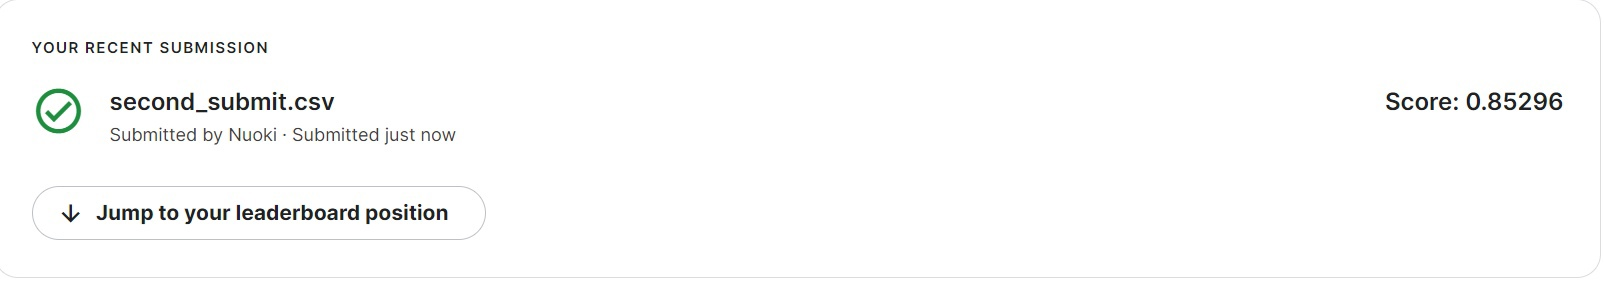

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [37]:
from pprint import pprint
print("Best score:", end=' ')
pprint(my_catboost.best_score_)

best_params = my_catboost.get_params()
print("Best params:", end=' ')
pprint(best_params)

Best score: {'learn': {'AUC': 0.8597384496866631, 'Logloss': 0.3997981294069469}}
Best params: {'cat_features': ['Sex',
                  'IsSeniorCitizen',
                  'HasPartner',
                  'HasChild',
                  'HasPhoneService',
                  'HasMultiplePhoneNumbers',
                  'HasInternetService',
                  'HasOnlineSecurityService',
                  'HasOnlineBackup',
                  'HasDeviceProtection',
                  'HasTechSupportAccess',
                  'HasOnlineTV',
                  'HasMovieSubscription',
                  'HasContractPhone',
                  'IsBillingPaperless',
                  'PaymentMethod'],
 'depth': 4,
 'eval_metric': 'AUC:hints=skip_train~false',
 'grow_policy': 'Lossguide',
 'iterations': 50,
 'learning_rate': 0.1,
 'logging_level': 'Silent',
 'metric_period': 100,
 'random_seed': 42,
 'random_strength': 1,
 'subsample': 1}


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.